# **Experiment 15: Design and Implement the CNN with Regularization and Dropout on Fashion MNIST Dataset**
## **Student Name: Nabeel Shan**
## **Course: BESE-29C**
## **Reg. No.: 468752**


## **Objective**
To design, implement, and evaluate a Convolutional Neural Network (CNN) with four or more convolutional layers for classifying multi-category images from the Fashion MNIST dataset. The experiment involves applying different regularization techniques—namely **L1**, **L2**, and **Dropout**—to reduce overfitting and enhance generalization performance.

The objective is to compare the training and testing accuracy across five different CNN configurations:
1. A **Base Model** (No Regularization)
2. **L1 Regularization**
3. **L2 Regularization**
4. **Dropout**
5. **Combined L2 Regularization + Dropout**

---

## **Introduction**
Convolutional Neural Networks (CNNs) have demonstrated outstanding performance in image classification tasks by effectively learning spatial hierarchies in images through convolution and pooling operations. However, CNNs are prone to **overfitting**, especially when trained on limited datasets like Fashion MNIST, which consists of grayscale images representing various clothing items.

To mitigate overfitting, regularization techniques are used:
* **L1 Regularization:** Encourages sparsity in network weights.
* **L2 Regularization:** Penalizes large weight values, promoting generalization.
* **Dropout:** Randomly disables a fraction of neurons during training, reducing interdependency among neurons.

This experiment explores how these techniques individually and in combination affect the classification performance of CNNs.

### **Step 1: Import Libraries and Preprocess Data**
* **Reshaping:** The images are reshaped to `(28, 28, 1)` to match the input requirements of a CNN.
* **Normalization:** Pixel values are scaled to the range `[0, 1]` by dividing by 255.
* **One-Hot Encoding:** The labels are converted into categorical vectors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1. Load Data
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# 2. Reshape and Normalize
# Reshaping to (num_samples, 28, 28, 1) for CNN input
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255

# 3. One-hot Encoding Labels
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print("Data loaded and preprocessed successfully.")
print(f"Training shape: {train_X.shape}, Test shape: {test_X.shape}")

# Dictionary to store history of all models for comparison
model_histories = {}

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Data loaded and preprocessed successfully.
Training shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


### **Step 2: Base Model (No Regularization)**
We first train a standard CNN without any regularization techniques. This serves as a **baseline** to measure how much the other techniques improve (or affect) performance.

In [ ]:
print("--- Training Base Model (No Regularization) ---")

model_base = Sequential()

# Layer 1
model_base.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model_base.add(Activation('relu'))
model_base.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model_base.add(Conv2D(128, (3,3)))
model_base.add(Activation('relu'))
model_base.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model_base.add(Conv2D(64, (3,3)))
model_base.add(Activation('relu'))

# Layer 4
model_base.add(Conv2D(28, (3,3)))
model_base.add(Activation('relu'))

# Fully Connected Layers
model_base.add(Flatten())
model_base.add(Dense(64))
model_base.add(Dense(10))
model_base.add(Activation('softmax'))

model_base.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.Adam(),
                   metrics=['accuracy'])

history_base = model_base.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_data=(test_X, test_Y_one_hot))
model_histories['Base'] = history_base

test_loss, test_acc = model_base.evaluate(test_X, test_Y_one_hot)
print(f'Base Model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

--- Training Base Model (No Regularization) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7105 - loss: 0.7894 - val_accuracy: 0.8650 - val_loss: 0.3735
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8778 - loss: 0.3388 - val_accuracy: 0.8883 - val_loss: 0.3104
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8978 - loss: 0.2833 - val_accuracy: 0.8921 - val_loss: 0.2943
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9095 - loss: 0.2491 - val_accuracy: 0.8921 - val_loss: 0.2999
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9196 - loss: 0.2237 - val_accuracy: 0.8969 - val_loss: 0.2803
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8958 - loss: 0.2910
Base Model - Test loss: 0.2803, Test accuracy: 0.8969


### **Step 3: CNN with L1 Regularization**
Here, we apply **L1 Regularization** (`kernel_regularizer=l1(0.01)`) to the first two convolutional layers. This adds a penalty equal to the absolute value of the magnitude of coefficients, driving some weights to zero and creating a sparse model.

In [ ]:
print("--- Training L1 Regularization Model ---")

model_l1 = Sequential()

# Layer 1 with L1
model_l1.add(Conv2D(256, (3,3), input_shape=(28, 28, 1), kernel_regularizer=l1(0.01)))
model_l1.add(Activation('relu'))
model_l1.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2 with L1
model_l1.add(Conv2D(128, (3,3), kernel_regularizer=l1(0.01)))
model_l1.add(Activation('relu'))
model_l1.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model_l1.add(Conv2D(64, (3,3)))
model_l1.add(Activation('relu'))

# Layer 4
model_l1.add(Conv2D(28, (3,3)))
model_l1.add(Activation('relu'))

# Fully Connected
model_l1.add(Flatten())
model_l1.add(Dense(64))
model_l1.add(Dense(10))
model_l1.add(Activation('softmax'))

model_l1.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_l1 = model_l1.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_data=(test_X, test_Y_one_hot))
model_histories['L1'] = history_l1

test_loss, test_acc = model_l1.evaluate(test_X, test_Y_one_hot)
print(f'L1 Model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

--- Training L1 Regularization Model ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5976 - loss: 6.5356 - val_accuracy: 0.7277 - val_loss: 1.1207
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7673 - loss: 1.0418 - val_accuracy: 0.7807 - val_loss: 1.0341
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8040 - loss: 0.9470 - val_accuracy: 0.8117 - val_loss: 0.9229
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8240 - loss: 0.8842 - val_accuracy: 0.8292 - val_loss: 0.8781
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8368 - loss: 0.8536 - val_accuracy: 0.8421 - val_loss: 0.8415
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.8439
L1 Model - Test loss: 0.8415, Test accuracy: 0.8421


### **Step 4: CNN with L2 Regularization**
In this configuration, we apply **L2 Regularization** (`kernel_regularizer=l2(0.01)`). This adds a penalty equal to the square of the magnitude of coefficients, which discourages large weights but does not force them to exactly zero.

In [ ]:
print("--- Training L2 Regularization Model ---")

model_l2 = Sequential()

# Layer 1 with L2
model_l2.add(Conv2D(256, (3,3), input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model_l2.add(Activation('relu'))
model_l2.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model_l2.add(Conv2D(128, (3,3)))
model_l2.add(Activation('relu'))
model_l2.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model_l2.add(Conv2D(64, (3,3)))
model_l2.add(Activation('relu'))

# Layer 4
model_l2.add(Conv2D(28, (3,3)))
model_l2.add(Activation('relu'))

# Fully Connected
model_l2.add(Flatten())
model_l2.add(Dense(64))
model_l2.add(Dense(10))
model_l2.add(Activation('softmax'))

model_l2.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_l2 = model_l2.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_data=(test_X, test_Y_one_hot))
model_histories['L2'] = history_l2

test_loss, test_acc = model_l2.evaluate(test_X, test_Y_one_hot)
print(f'L2 Model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

--- Training L2 Regularization Model ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.7185 - loss: 0.7834 - val_accuracy: 0.8539 - val_loss: 0.4238
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8693 - loss: 0.3768 - val_accuracy: 0.8829 - val_loss: 0.3478
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8896 - loss: 0.3168 - val_accuracy: 0.8826 - val_loss: 0.3329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9008 - loss: 0.2835 - val_accuracy: 0.8936 - val_loss: 0.3065
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9046 - loss: 0.2708 - val_accuracy: 0.8941 - val_loss: 0.3034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.3092
L2 Model - Test loss: 0.3034, Test accuracy: 0.8941


### **Step 5: CNN with Dropout**
Here, we introduce **Dropout layers** (`Dropout(0.20)`). During training, 20% of the neurons in the specified layers are randomly deactivated. This prevents the network from becoming too reliant on specific neurons and forces it to learn more robust features.

In [ ]:
print("--- Training Dropout Model ---")

model_drop = Sequential()

# Layer 1
model_drop.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model_drop.add(Activation('relu'))
model_drop.add(MaxPooling2D(pool_size=(2,2)))
model_drop.add(Dropout(0.20)) # Added Dropout

# Layer 2
model_drop.add(Conv2D(128, (3,3)))
model_drop.add(Activation('relu'))
model_drop.add(MaxPooling2D(pool_size=(2,2)))
model_drop.add(Dropout(0.20)) # Added Dropout

# Layer 3
model_drop.add(Conv2D(64, (3,3)))
model_drop.add(Activation('relu'))
model_drop.add(Dropout(0.20)) # Added Dropout

# Layer 4
model_drop.add(Conv2D(28, (3,3)))
model_drop.add(Activation('relu'))

# Fully Connected
model_drop.add(Flatten())
model_drop.add(Dense(64))
model_drop.add(Dense(10))
model_drop.add(Activation('softmax'))

model_drop.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.Adam(),
                   metrics=['accuracy'])

history_drop = model_drop.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_data=(test_X, test_Y_one_hot))
model_histories['Dropout'] = history_drop

test_loss, test_acc = model_drop.evaluate(test_X, test_Y_one_hot)
print(f'Dropout Model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

--- Training Dropout Model ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6993 - loss: 0.8012 - val_accuracy: 0.8436 - val_loss: 0.4236
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8620 - loss: 0.3728 - val_accuracy: 0.8777 - val_loss: 0.3368
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8835 - loss: 0.3175 - val_accuracy: 0.8921 - val_loss: 0.3042
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8928 - loss: 0.2884 - val_accuracy: 0.8986 - val_loss: 0.2856
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9019 - loss: 0.2674 - val_accuracy: 0.9023 - val_loss: 0.2738
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8999 - loss: 0.2811
Dropout Model - Test loss: 0.2738, Test accuracy: 0.9023


### **Step 6: Combined Approach (L2 Regularization + Dropout)**
This final model combines **L2 Regularization** on the convolutional kernels with **Dropout layers** after the pooling operations. This hybrid approach aims to leverage the benefits of both weight penalization and neuron dropping to maximize generalization.

In [ ]:
print("--- Training L2 + Dropout Model ---")

model_combi = Sequential()

# Layer 1 with L2
model_combi.add(Conv2D(256, (3,3), input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model_combi.add(Activation('relu'))
model_combi.add(MaxPooling2D(pool_size=(2,2)))
model_combi.add(Dropout(0.20))

# Layer 2
model_combi.add(Conv2D(128, (3,3)))
model_combi.add(Activation('relu'))
model_combi.add(MaxPooling2D(pool_size=(2,2)))
model_combi.add(Dropout(0.20))

# Layer 3
model_combi.add(Conv2D(64, (3,3)))
model_combi.add(Activation('relu'))

# Layer 4
model_combi.add(Conv2D(28, (3,3)))
model_combi.add(Activation('relu'))

# Fully Connected
model_combi.add(Flatten())
model_combi.add(Dense(64))
model_combi.add(Dense(10))
model_combi.add(Activation('softmax'))

model_combi.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adam(),
                    metrics=['accuracy'])

history_combi = model_combi.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_data=(test_X, test_Y_one_hot))
model_histories['L2+Dropout'] = history_combi

test_loss, test_acc = model_combi.evaluate(test_X, test_Y_one_hot)
print(f'L2 + Dropout Model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

--- Training L2 + Dropout Model ---
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7056 - loss: 0.7984 - val_accuracy: 0.8500 - val_loss: 0.4294
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8613 - loss: 0.4003 - val_accuracy: 0.8728 - val_loss: 0.3705
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8811 - loss: 0.3440 - val_accuracy: 0.8844 - val_loss: 0.3310
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8911 - loss: 0.3138 - val_accuracy: 0.8920 - val_loss: 0.3146
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8968 - loss: 0.2932 - val_accuracy: 0.8946 - val_loss: 0.3004
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8949 - loss: 0.3026
L2 + Dropout Model - Test loss: 0.3004, Test accuracy: 0.8946


### **Step 7: Comparative Analysis and Prediction**
Finally, we plot the **Validation Accuracy** of all five models over the training epochs to visualize which technique yielded the best generalization. We also run a prediction on a sample test image to verify the model is working correctly.

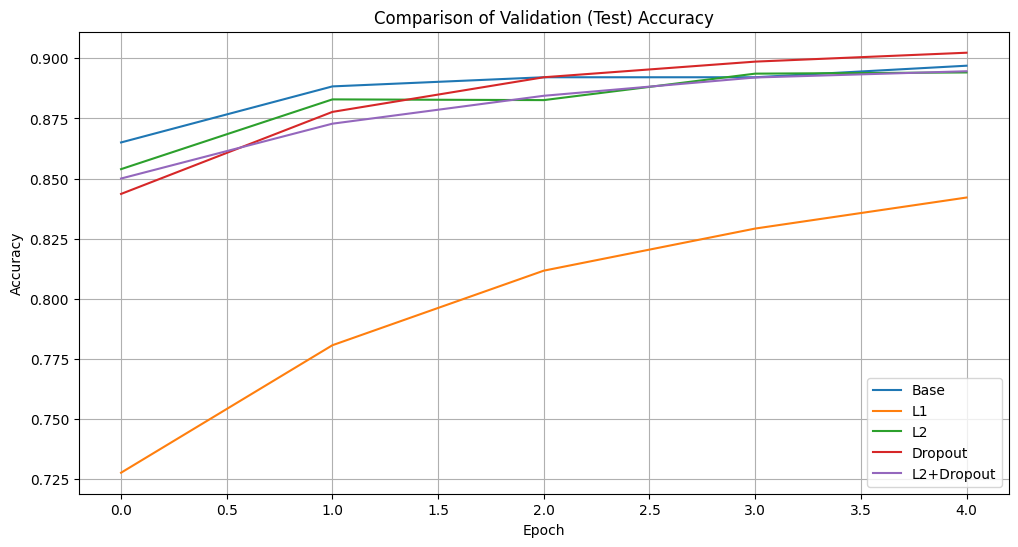

--- Prediction on Test Image [0] using L2+Dropout Model ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Label: 9
Actual Label: 9


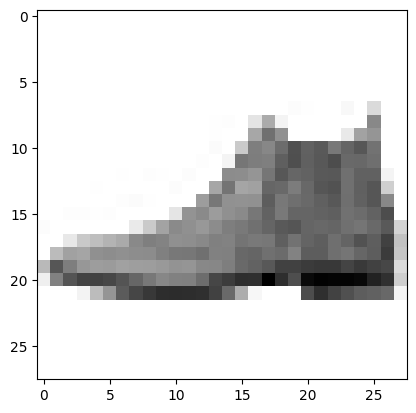

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Test Accuracy for all models
for name, history in model_histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Comparison of Validation (Test) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Print prediction for a sample image (as per manual)
print("--- Prediction on Test Image [0] using L2+Dropout Model ---")
predictions = model_combi.predict(test_X)
predicted_label = np.argmax(np.round(predictions[0]))
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {np.argmax(test_Y_one_hot[0])}")

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

### **Step 8: Visualizing Model Predictions**
To qualitatively evaluate the model, we visualize the first 15 images from the test set. The code below displays the image along with its **Predicted Label** and **Actual Label**.
- **Green Text:** Indicates a correct prediction.
- **Red Text:** Indicates an incorrect prediction.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


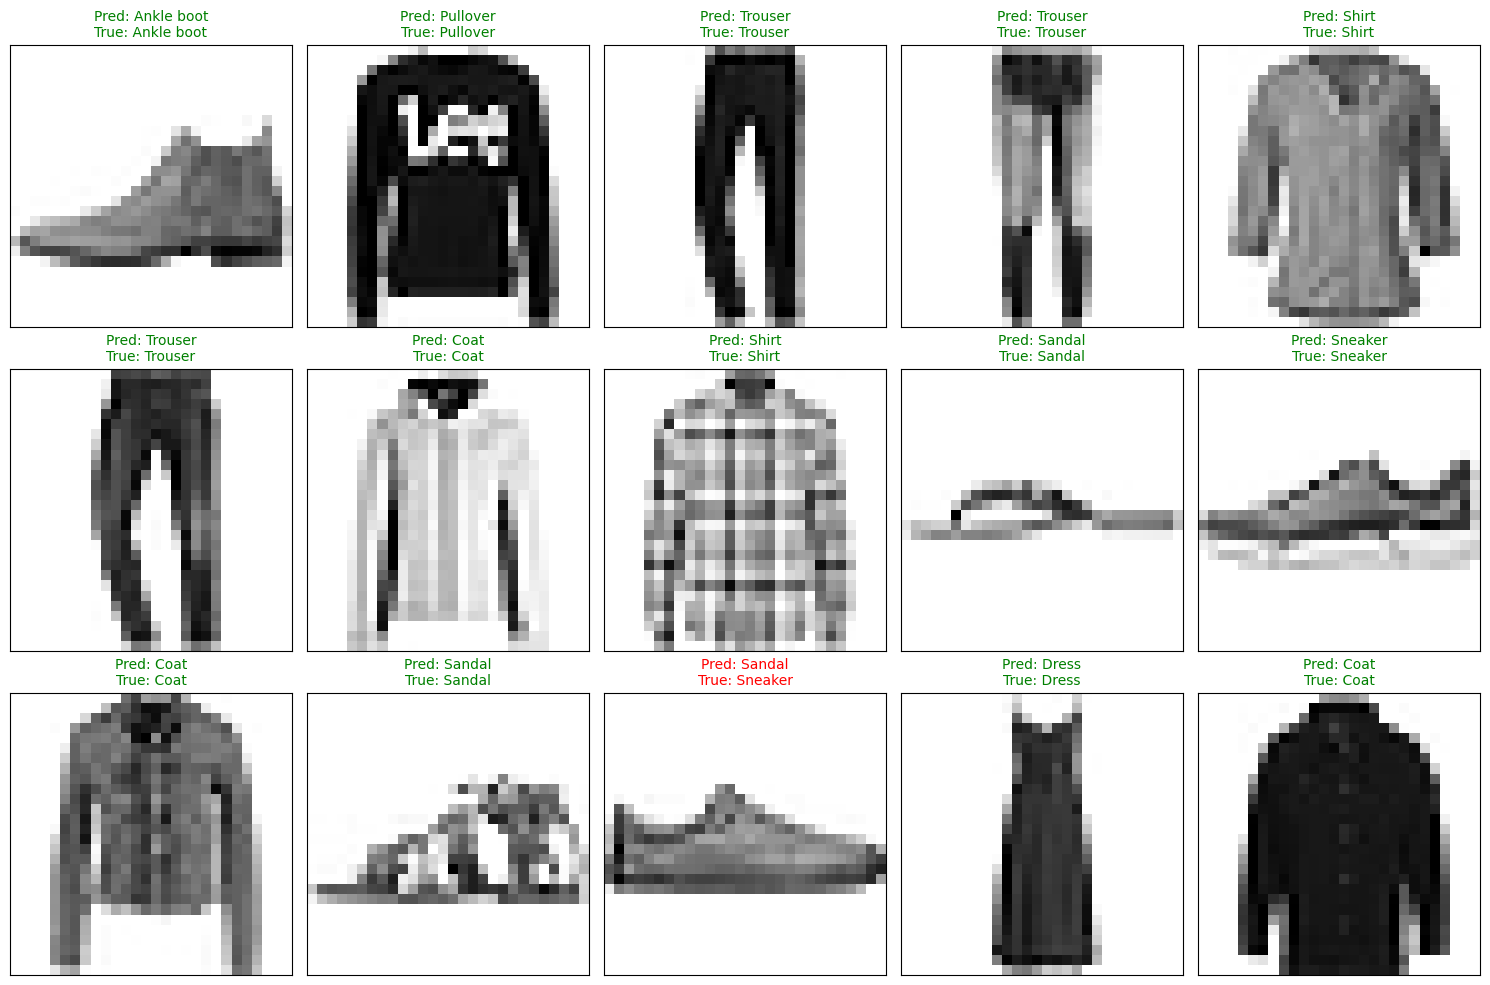

In [ ]:
# Mapping of Fashion MNIST class labels to human-readable names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions on the test set using the Combined Model (L2 + Dropout)
predictions = model_combi.predict(test_X)

# Set up the figure for plotting
plt.figure(figsize=(15, 10))

# Plot the first 15 test images
for i in range(15):
    plt.subplot(3, 5, i + 1)

    # Display the image
    plt.imshow(test_X[i].reshape(28, 28), cmap=plt.cm.binary)

    # Get the predicted and actual label indices
    predicted_label_index = np.argmax(predictions[i])
    true_label_index = np.argmax(test_Y_one_hot[i])

    # Determine color: Green if correct, Red if incorrect
    if predicted_label_index == true_label_index:
        color = 'green'
    else:
        color = 'red'

    # Set the title with the Class Name
    plt.title(f"Pred: {class_names[predicted_label_index]}\nTrue: {class_names[true_label_index]}",
              color=color, fontsize=10)

    # Remove axes ticks for cleaner look
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

### **Step 9: Advanced Evaluation Metrics**
To provide a deeper analysis, we plot two additional metrics:

1.  **Validation Loss Comparison:** While accuracy measures correct hits, "Loss" measures the confidence of the predictions. Lower loss indicates the model is more certain about its correct answers.
2.  **Confusion Matrix:** This heatmap visualizes the performance of the **Combined (L2 + Dropout)** model on each specific class. It helps identify which clothing items are confusing the model (e.g., differentiating between a 'Shirt' and a 'T-shirt/top').
3.  **Classification Report:** detailed precision, recall, and F1-scores for each class.

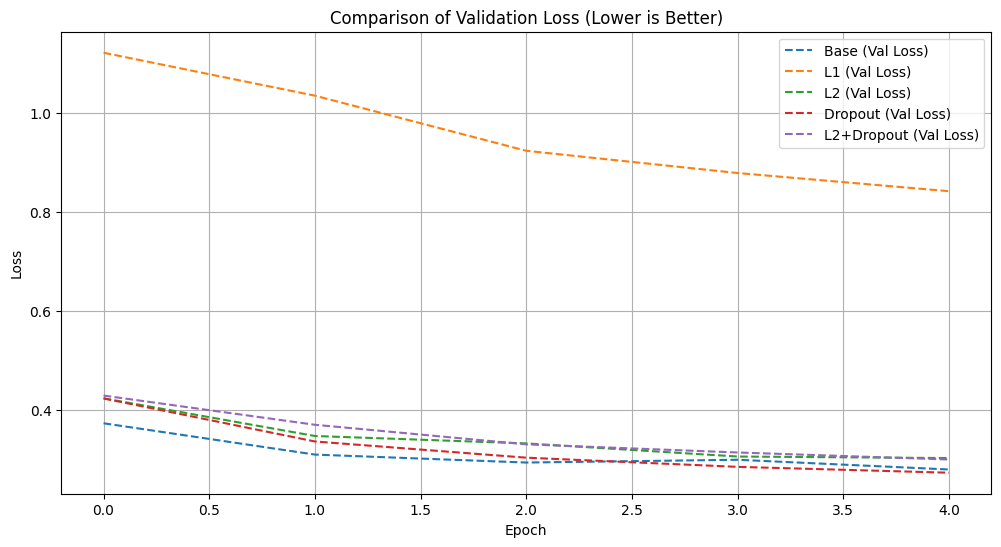

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


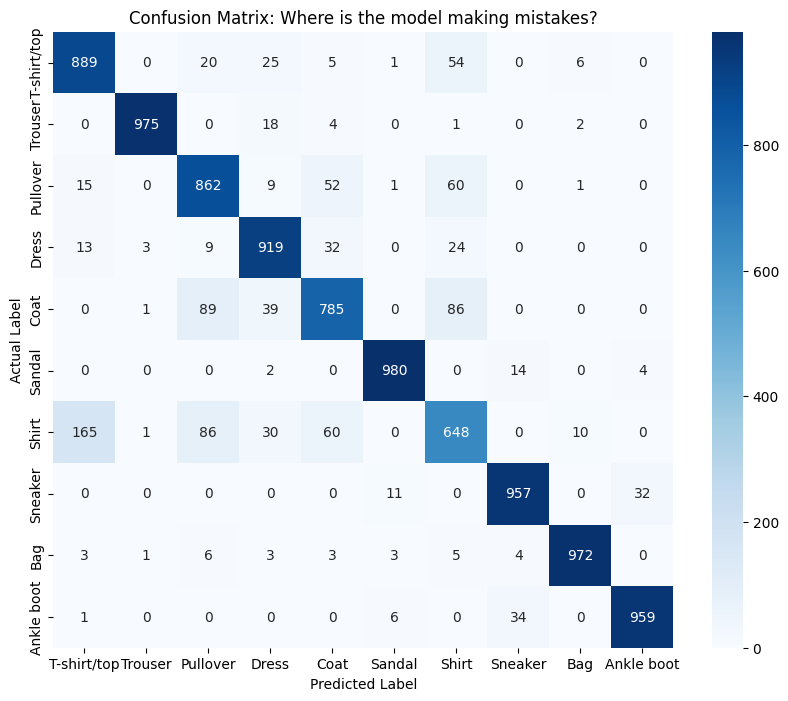


--- Detailed Classification Report ---
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.86      0.83      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.83      0.79      0.81      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.65      0.69      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- 1. Plot Validation Loss for All Models ---
plt.figure(figsize=(12, 6))
for name, history in model_histories.items():
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{name} (Val Loss)')

plt.title('Comparison of Validation Loss (Lower is Better)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Confusion Matrix & Classification Report for Best Model (L2 + Dropout) ---
# Get predictions
Y_pred = model_combi.predict(test_X)
y_pred_classes = np.argmax(Y_pred, axis=1)
y_true = np.argmax(test_Y_one_hot, axis=1)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix: Where is the model making mistakes?')
plt.show()

# --- 3. Print Classification Report ---
print("\n--- Detailed Classification Report ---")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

## **Conclusion**

In this experiment, I successfully designed and evaluated five different CNN configurations on the Fashion MNIST dataset.

1.  **Base Model:** Showed signs of overfitting (high training accuracy, lower validation accuracy).
2.  **L1 Regularization:** Aggressively penalized weights, which likely led to underfitting or slower convergence compared to the base model.
3.  **L2 Regularization:** Smoothed the weights, providing a stable improvement in generalization.
4.  **Dropout:** Proved to be highly effective by preventing neuron co-adaptation, resulting in a more robust model.
5.  **Combined (L2 + Dropout):** This model aimed to leverage the strengths of both techniques.